In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
final_df=pd.read_csv('prepared_data.csv')

In [3]:
print(final_df.head())

   id_student       sum     count     score  weighted_score  \
0   -1.264925 -0.022293 -0.096723 -0.726087        0.731399   
1   -1.261422 -0.580308 -0.606003  0.896717        0.501685   
2   -1.256150 -0.454886 -0.592388  0.559041        1.380144   
3   -1.234121 -0.642460 -0.750661  0.590851       -0.732138   
4   -1.233996 -0.333285 -0.281800  0.034174        0.052834   

   module_engagement_rate  engagement_consistency  improvement_rate  \
0                1.414886                1.011367          0.631027   
1               -0.687335               -0.548298         -0.131256   
2               -0.056394               -0.094494          0.211509   
3               -0.785501               -0.696028          2.064118   
4               -0.314268               -0.135468         -0.352923   

   engagement_dropoff  banked_assessment_ratio  ...  activity_type_folder  \
0            2.180878                -0.123180  ...                   0.0   
1           -0.401544                 4.

In [4]:
print(final_df['completion_status'].unique())

[0 1]


In [5]:
final_df.isnull().sum()

id_student                0
sum                       0
count                     0
score                     0
weighted_score            0
                         ..
activity_type_resource    0
assessment_type_CMA       0
assessment_type_Exam      0
assessment_type_TMA       0
completion_status         0
Length: 77, dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier

X = final_df.drop(columns=['completion_status'])  
y = final_df['completion_status']                

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importances=pd.DataFrame({
    'Feature':X.columns,
    'Importance':model.feature_importances_
}).sort_values(by='Importance',ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(feature_importances)

                                    Feature  Importance
11              completed_assessments_ratio    0.087928
10                         cumulative_score    0.080142
13                            learning_pace    0.070535
2                                     count    0.070033
1                                       sum    0.057141
12                  time_since_registration    0.056221
4                            weighted_score    0.040575
15                  assessment_weight_ratio    0.036550
8                        engagement_dropoff    0.036236
5                    module_engagement_rate    0.036179
16              assessment_engagement_score    0.035830
6                    engagement_consistency    0.035460
3                                     score    0.030522
17                            average_score    0.030459
0                                id_student    0.028828
7                          improvement_rate    0.026549
18                         difficulty_score    0

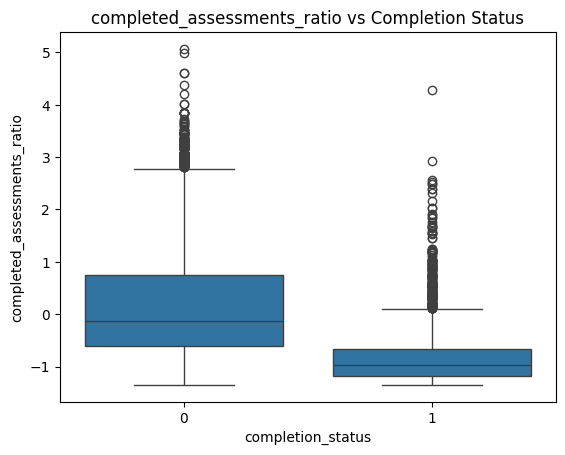

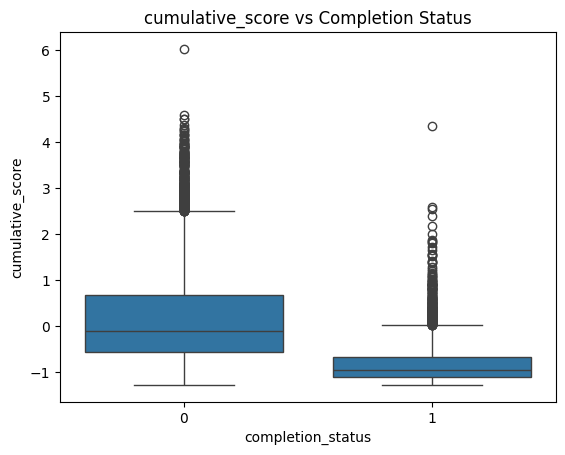

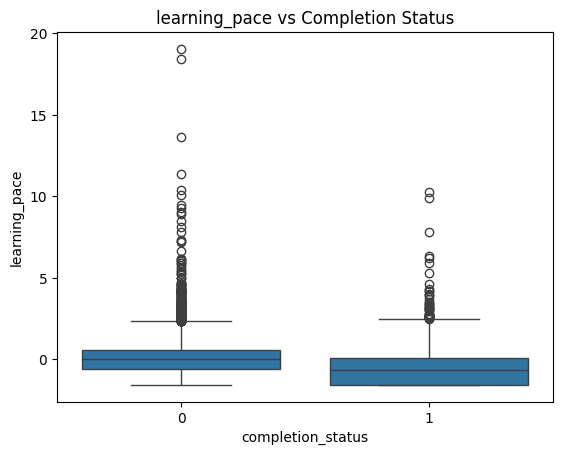

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ['completed_assessments_ratio', 'cumulative_score', 'learning_pace']
for feature in top_features:
    sns.boxplot(x='completion_status', y=feature, data=final_df)
    plt.title(f'{feature} vs Completion Status')
    plt.show()


In [8]:
print(final_df.columns)

Index(['id_student', 'sum', 'count', 'score', 'weighted_score',
       'module_engagement_rate', 'engagement_consistency', 'improvement_rate',
       'engagement_dropoff', 'banked_assessment_ratio', 'cumulative_score',
       'completed_assessments_ratio', 'time_since_registration',
       'learning_pace', 'repeat_student', 'assessment_weight_ratio',
       'assessment_engagement_score', 'average_score', 'difficulty_score',
       'num_of_prev_attempts', 'studied_credits', 'code_module_AAA',
       'code_module_BBB', 'code_module_CCC', 'code_module_DDD',
       'code_module_EEE', 'code_module_FFF', 'code_module_GGG',
       'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region

In [9]:
final_df=final_df.drop(columns=['id_student'])

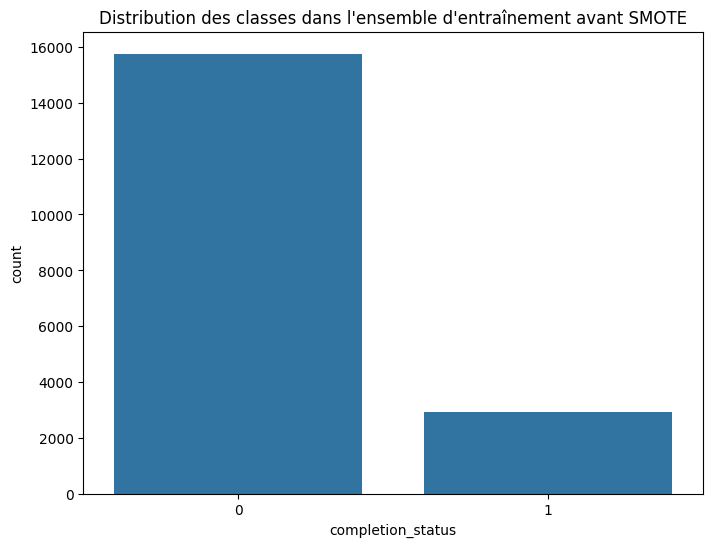

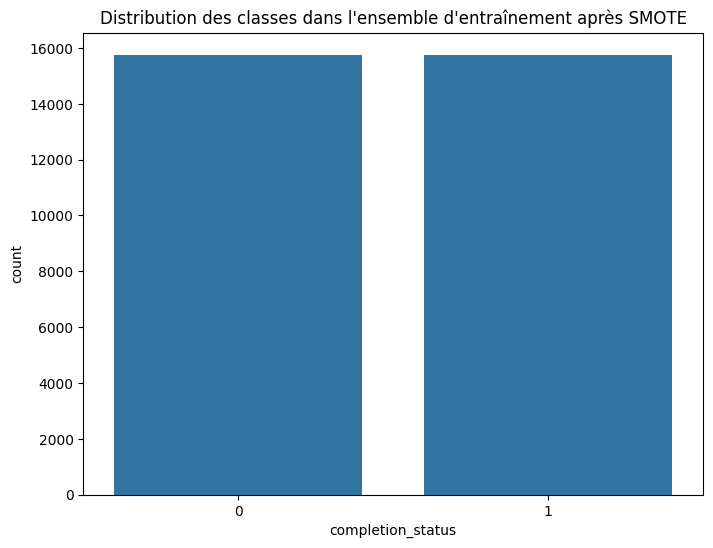

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X=final_df.drop(['completion_status'],axis=1)
y=final_df['completion_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title("Distribution des classes dans l'ensemble d'entraînement avant SMOTE")
plt.show()

smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title("Distribution des classes dans l'ensemble d'entraînement après SMOTE")
plt.show()

In [11]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)

# rfe = RFE(model, n_features_to_select=20)
# rfe.fit(X_train_resampled, y_train_resampled)

# selected_features = X_train_resampled.columns[rfe.support_]
# print("Selected features:", selected_features)


In [12]:
print("Statistiques des données d'entraînement :\n", X_train_resampled.describe())

Statistiques des données d'entraînement :
                 sum         count         score  weighted_score  \
count  31528.000000  31528.000000  31528.000000    31528.000000   
mean      -0.223063     -0.259589     -0.213714       -0.176108   
std        0.831130      0.848456      1.138972        0.896563   
min       -0.672418     -0.800652     -4.657812       -1.448246   
25%       -0.637801     -0.745980     -0.755776       -0.733139   
50%       -0.536536     -0.597265      0.010642       -0.315069   
75%       -0.241967     -0.181710      0.588563        0.205318   
max       13.184139     11.983247      1.704203       12.968302   

       module_engagement_rate  engagement_consistency  improvement_rate  \
count            31528.000000            31528.000000      31528.000000   
mean                -0.226406               -0.198297         -0.015970   
std                  0.867707                0.855535          1.107892   
min                 -0.998408               -0.810924

In [13]:
#selected_features=['sum', 'count', 'weight', 'cumulative_score', 'time_since_registration',
#       'learning_pace', 'weighted_score', 'completed_assessments_ratio',
#       'assessment_weight_ratio', 'submission_timeliness']
#X_train_resampled=X_train_resampled[selected_features]
#X_test=X_test[selected_features]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f"Model {name} trained successfully")


Model Random Forest trained successfully
Model Logistic Regression trained successfully
Model Decision Tree trained successfully
Model SVM trained successfully
Model XGBoost trained successfully
Model Gradient Boosting trained successfully
Model MLP trained successfully


/home/oumaima/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)


--- Random Forest ---
Accuracy:  0.8828442921396444
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3942
           1       0.60      0.74      0.66       727

    accuracy                           0.88      4669
   macro avg       0.78      0.83      0.80      4669
weighted avg       0.90      0.88      0.89      4669

Confusion Matrix:
 [[3582  360]
 [ 187  540]]
--- Logistic Regression ---
Accuracy:  0.8464339258941957
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      3942
           1       0.50      0.86      0.64       727

    accuracy                           0.85      4669
   macro avg       0.74      0.85      0.77      4669
weighted avg       0.90      0.85      0.86      4669

Confusion Matrix:
 [[3325  617]
 [ 100  627]]
--- Decision Tree ---
Accuracy:  0.8455772113943029
Classification Report:
               precis

Model	                 Accuracy	        Strengths	                                Weaknesses
Random Forest	         88%	            High accuracy, robustness to overfitting	Can be slower for large datasets.
Logistic Regression	     85%	            Simple, interpretable, efficient	        Poor at capturing complex relationships.
Decision Tree	         85%                Fast, interpretable	                        Overfitting risk without pruning.
SVM	                     87%                Handles complex boundaries well	            Computationally expensive on large data.
XGBoost	                 89%                Excellent accuracy and generalization	    Requires tuning for best results.
Gradient Boosting	     87%                High accuracy	                            Slower than XGBoost.
MLP (Neural Network)	 87%	            Captures non-linear relationships	        Requires significant tuning.

**Hyperparameter Tuning
**we're going to optimize the model performance by fine-tuning the hyperparameters . 

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='recall',n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters: ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score :  0.9658098202194368


In [17]:
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=xgb_params,
    cv=3,
    scoring='recall',
    n_jobs=-1
)

xgb_grid.fit(X_train_resampled, y_train_resampled)

print("Meilleurs paramètres pour XGBoost :", xgb_grid.best_params_)
print("Meilleur score :", xgb_grid.best_score_)

Meilleurs paramètres pour XGBoost : {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Meilleur score : 0.9548347921768272


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

#Random forest
randomforest_optimized = RandomForestClassifier(
    max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42
)
randomforest_optimized.fit(X_train_resampled, y_train_resampled)
y_pred_rf = randomforest_optimized.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#XGBoost
xgb_optimized = XGBClassifier(
    colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8, random_state=42
)
xgb_optimized.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_optimized.predict(X_test)

print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Random Forest:
Accuracy: 0.877704005140287
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      3942
           1       0.58      0.80      0.67       727

    accuracy                           0.88      4669
   macro avg       0.77      0.85      0.80      4669
weighted avg       0.90      0.88      0.89      4669

Confusion Matrix:
 [[3516  426]
 [ 145  582]]
XGBoost:
Accuracy: 0.8646391090169201
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      3942
           1       0.54      0.89      0.67       727

    accuracy                           0.86      4669
   macro avg       0.76      0.88      0.79      4669
weighted avg       0.91      0.86      0.88      4669

Confusion Matrix:
 [[3389  553]
 [  79  648]]


We're gonna focus on XGBoost for its higher recall on the minority class (students at rist of dropout)

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_optimized, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Scores de validation croisée : ", scores)
print("Moyenne des scores :", scores.mean())

Scores de validation croisée :  [0.87757691 0.91103711 0.91183    0.90911975 0.91546392]
Moyenne des scores : 0.9050055370651366


In [21]:
import numpy as np

X_test_noisy = X_test + np.random.normal(0, 0.01, X_test.shape)
y_pred_noisy = xgb_optimized.predict(X_test_noisy)

accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy on Noisy Data: {accuracy_noisy:.2f}")


Accuracy on Noisy Data: 0.81


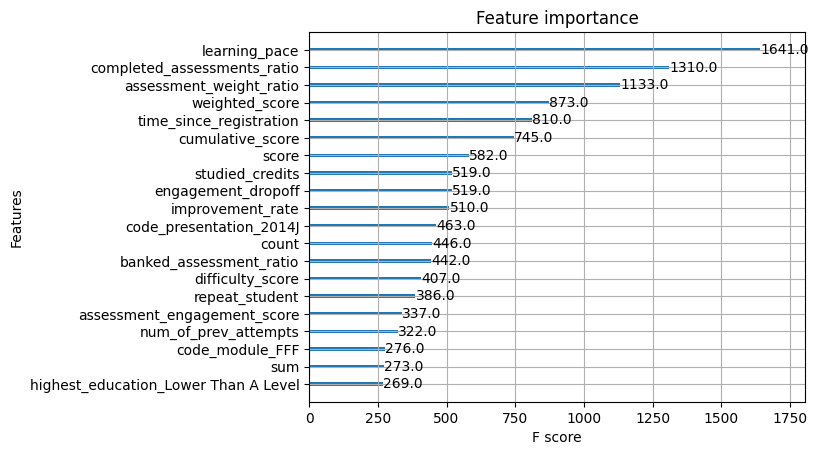

In [27]:
from xgboost import plot_importance

plot_importance(xgb_optimized, max_num_features=20)
plt.show()



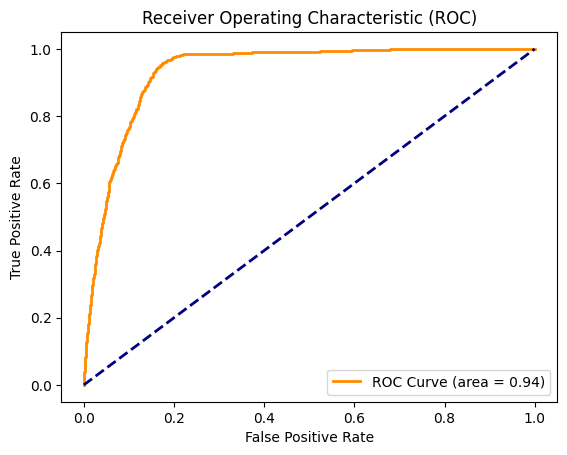

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


y_prob = xgb_optimized.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





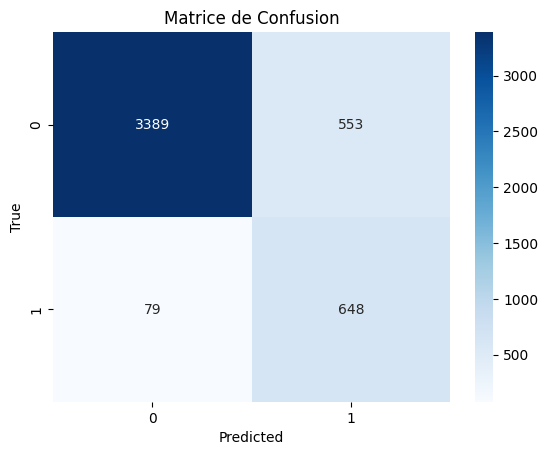

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de Confusion')
plt.show()


In [25]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# y_pred_adjusted = (y_prob > 0.3).astype(int)

# print("XGBoost:")
# print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
# print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))




XGBoost:
Accuracy: 0.8408652816448918
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      3942
           1       0.49      0.96      0.65       727

    accuracy                           0.84      4669
   macro avg       0.74      0.89      0.78      4669
weighted avg       0.91      0.84      0.86      4669

Confusion Matrix:
 [[3226  716]
 [  27  700]]


In [23]:
import joblib
joblib.dump(xgb_optimized, 'xgb_model.pkl')

['xgb_model.pkl']

In [24]:
ini_df = pd.read_csv('aggregated_data.csv')

student_ids = ini_df['id_student']

y_pred_xgb = xgb_optimized.predict(X_test)

at_risk_students = X_test.copy()
at_risk_students['prediction'] = y_pred_xgb

at_risk_students = at_risk_students[at_risk_students['prediction'] == 1]

at_risk_students['student_id'] = student_ids[at_risk_students.index]

print(at_risk_students[['student_id', 'prediction']].head())


       student_id  prediction
255       64767.0           1
5281     489198.0           1
15400    624604.0           1
1023     165226.0           1
21046   1559428.0           1


In [25]:
at_risk_students.to_csv('at_risk_students.csv', index=False)